In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = (
    fashion_mnist.load_data()
)  # automatically split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(test_images.shape)
# print(type(train_images))

(60000, 28, 28)
(10000, 28, 28)
<class 'numpy.ndarray'>


In [4]:
# train_images[0,23,23] #image size is 28*28. we are looking into the pixel value of the 23*23rd pixel of the first image

194

In [5]:
# It's  greyscale. from 0 to 255. 0 is black, 255 is white
train_labels[:10]  # first 10 training labels
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

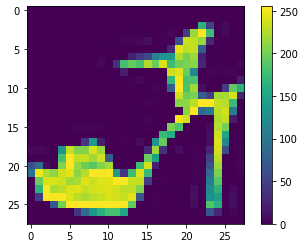

In [6]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.show()

In [7]:
# Pre-process the data
# make our pixel value between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [16]:
# Building the model achitecture
model = tf.keras.Sequential(
    [  # Basic form of NN
        tf.keras.layers.Flatten(
            input_shape=(28, 28)
        ),  # input layer. Converts 28*28 into a single row of 784
        tf.keras.layers.Dense(
            128, activation="relu"
        ),  # hidden layer. Dense means fully connected to prev nodes. 128 nodes in hidden layer. relu activation
        tf.keras.layers.Dense(
            10, activation="softmax"
        ),  # output layer. 10 are no of classes
    ]
)

In [17]:
model.compile(
    optimizer="adam",  # replacement optimization algorithm for stochastic gradient descent for training deep learning models
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5023 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3384 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3128 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2671 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2576 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("\nTest accuracy:", test_acc)
# test accuracy is lower (88.4) so the model is overfitting. So you can change some of the hyperparameters to get better results

313/313 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8845

Test accuracy: 0.8845000267028809
